<a href="https://colab.research.google.com/github/PeriAdan/sales-predictions/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The analysis of data from Kaggle "Big Mart Prediction". I have analyzed itemsets to see the increase in sales to help the company predict sales in the future. 
We have used different methods, cleaning and exploring data. Visualizing the data and creating Machine learning models. 
```
```



In [136]:
import pandas as pd

In [137]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
df = pd.read_csv ("/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/sales_predictions.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [139]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Exploring the data and preparing for future functions **

In [140]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [141]:
df.shape

(8523, 12)

**The overall summary of dataset**

In [142]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]>

**Next step is cleaning data and checking for missign values**

In [144]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [145]:
df['Outlet_Size'].isnull()

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [146]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [147]:
# filling a null values using fillna() 
df["Outlet_Size"].fillna("Unknown", inplace = True) 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [148]:
df["Outlet_Size"].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [149]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [150]:
df['Item_Weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [151]:
df['Item_Weight'].isnull().values.any()

True

In [152]:
#df["Item_Weight"].fillna("1", inplace = True) 
#df.head()

df['Item_Weight'].interpolate(inplace=True)
df['Item_Weight'].isnull().sum()
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [153]:
df.isnull().values.any()

False

In [154]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Visualizing the data**

In [156]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.066132,140.992782,1997.831867,2181.288914
std,4.445074,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [157]:
df["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [158]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**DATA** exploration


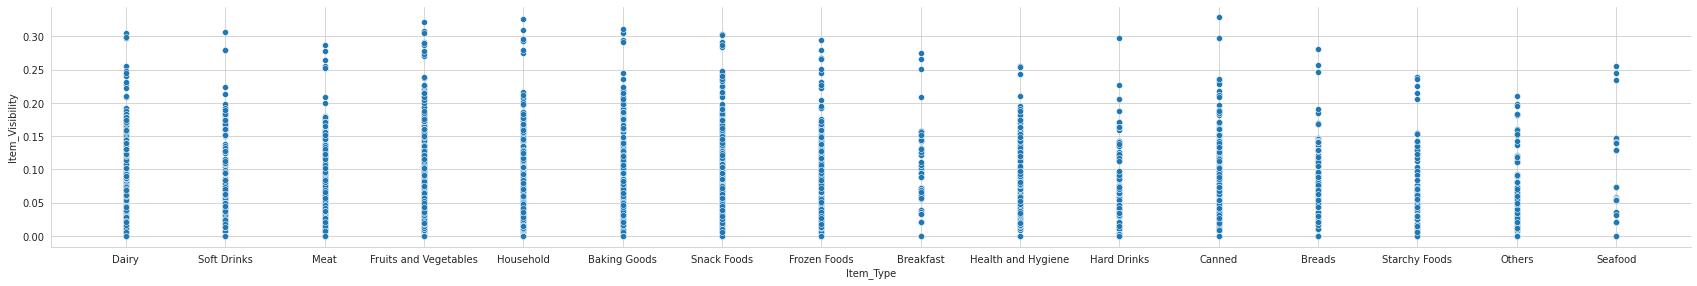

In [159]:
sns.pairplot(df, x_vars=['Item_Type',], y_vars='Item_Visibility', height=4, aspect=6, kind='scatter')
plt.show()

This Sns Pairplot shows item visibility by time type.

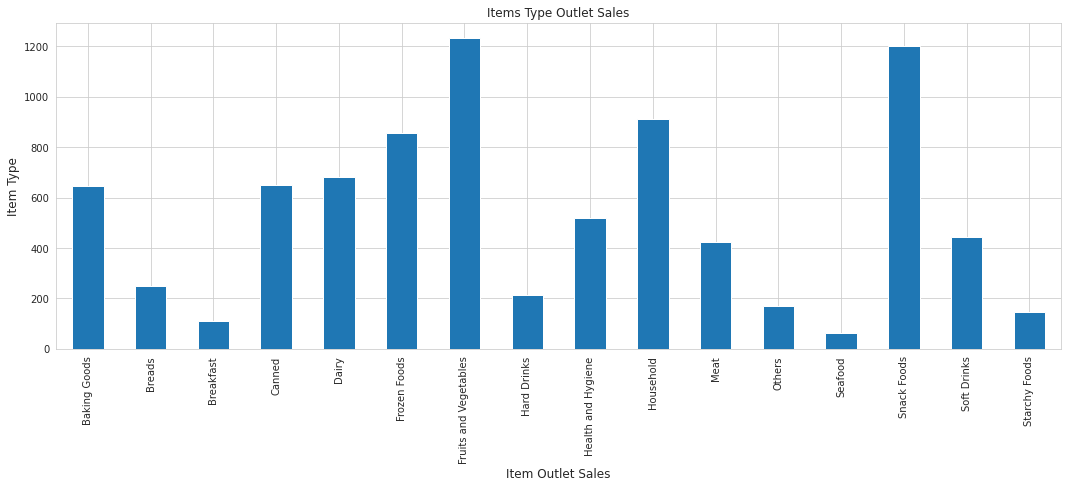

In [160]:
plt.figure(figsize=(18,6))
df.groupby('Item_Type')['Item_Outlet_Sales'].count().plot.bar()
plt.title("Items Type Outlet Sales")
plt.ylabel('Item Type', fontsize=12)
plt.xlabel('Item Outlet Sales', fontsize=12)
plt.show()

This bar helps us to understand the sales by item types. Highest sales we have with Snack food and Fruits and Vegetables. 

In [161]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

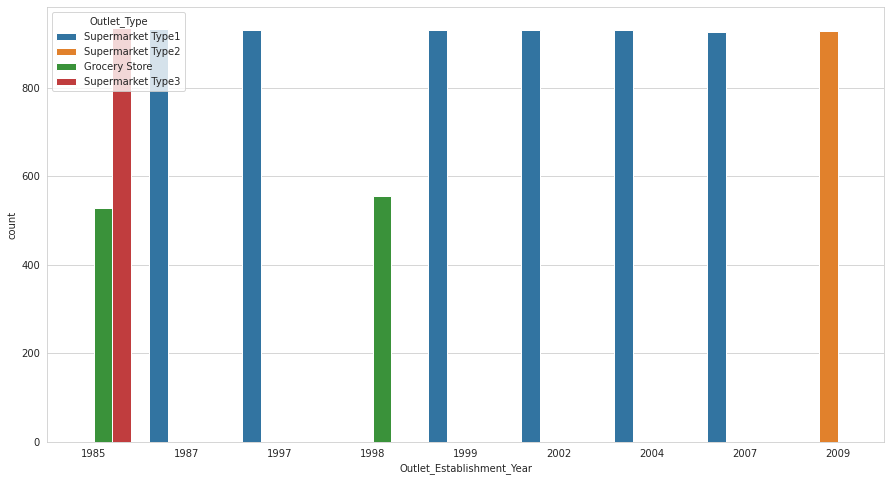

In [162]:
plt.figure(figsize=(15,8))
sns.countplot(x="Outlet_Establishment_Year",hue="Outlet_Type",data=df)

**From this plot, we can see what type of supermarkets were popular throughout the years.**

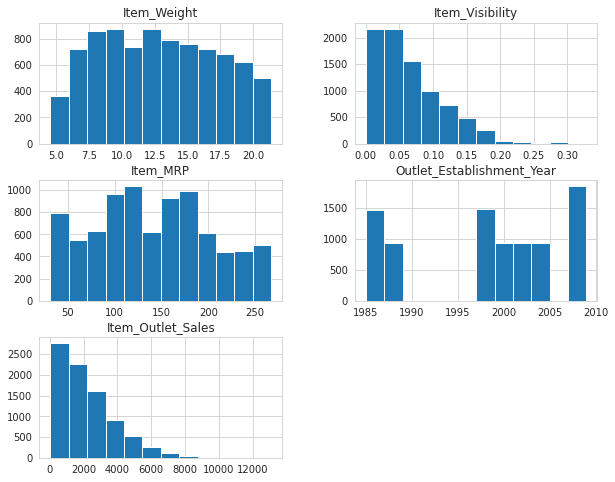

In [163]:
num_bins = 12

df.hist(bins=num_bins, figsize=(10,8))
plt.savefig("df_histogram_plots")
plt.show()

**Correlation matrix generation:**

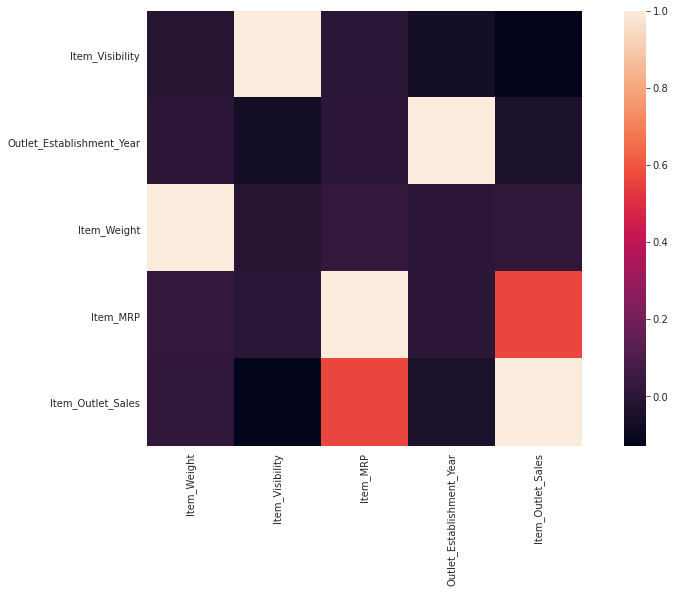

In [164]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr().sort_values(by = ['Item_Outlet_Sales']), square=True)

In [165]:
df['Item_Outlet_Sales'].values


array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [166]:
df['Outlet_Type'].values


array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1', ...,
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1'],
      dtype=object)

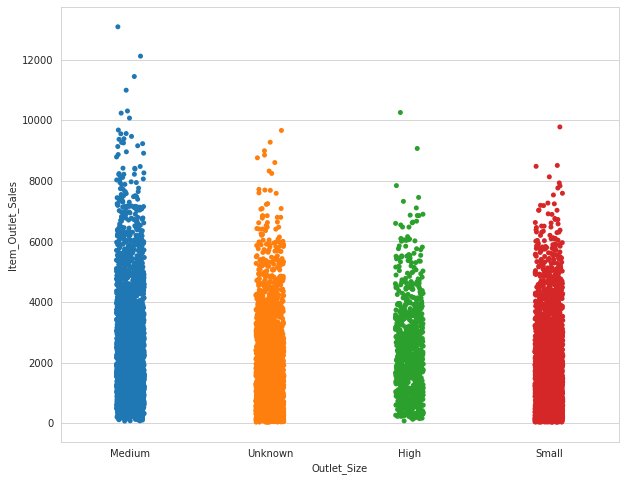

In [167]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax = sns.stripplot(x="Outlet_Size", y="Item_Outlet_Sales",data=df)

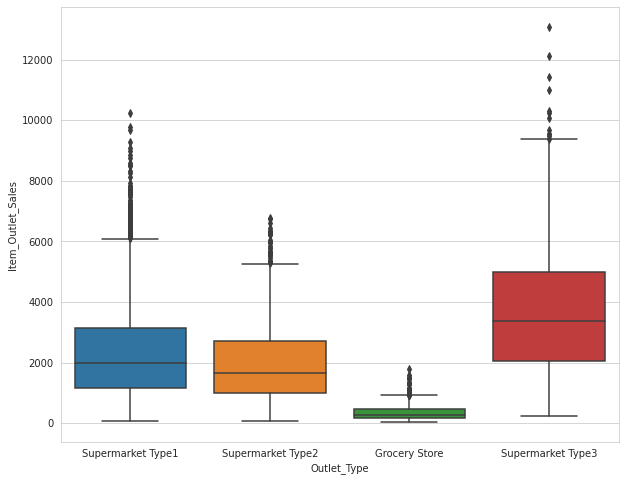

In [168]:
plt.figure(figsize=(10,8))
ax= sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

**Creating ML Models**

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


In [170]:
df.shape

(8523, 12)

In [171]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Changing Categorical Variables:**

In [172]:
df["Outlet_Size"].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [173]:
OutSizes = {'Small': 0, 'Medium': 1, 'High': 2, "Unknown":3}

In [174]:
df['Outlet_Size'] = df['Outlet_Size'].map(OutSizes)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


In [175]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [176]:
df["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular", "low fat":"Low Fat"}, inplace=True)


In [177]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [178]:
ItemFat = {'Low Fat': 1, 'Regular': 2}

In [179]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map(ItemFat)


In [180]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


In [181]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [182]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [183]:
df = pd.get_dummies(df, columns = ['Outlet_Type', 'Outlet_Location_Type'],
                               drop_first = True)


In [184]:
df.drop(columns = "Item_Type", inplace=True)

In [185]:
df.drop(columns="Item_Identifier", inplace=True)

In [186]:
df.drop(columns="Outlet_Identifier", inplace=True)

In [187]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,1,0.016047,249.8092,1999,1,3735.1380,1,0,0,0,0
1,5.92,2,0.019278,48.2692,2009,1,443.4228,0,1,0,0,1
2,17.50,1,0.016760,141.6180,1999,1,2097.2700,1,0,0,0,0
3,19.20,2,0.000000,182.0950,1998,3,732.3800,0,0,0,0,1
4,8.93,1,0.000000,53.8614,1987,2,994.7052,1,0,0,0,1


**KNN MODEL**

In [188]:
X = df.drop(columns = "Item_Outlet_Sales")


In [189]:
X.shape

(8523, 11)

In [190]:
y = df['Item_Outlet_Sales'].values

In [191]:
y.shape

(8523,)

In [192]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X);

In [193]:
knn = KNeighborsRegressor()

In [194]:
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


In [195]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [196]:
pred = knn.predict(X)
pred

array([3895.19632,  624.65356, 3112.08236, ..., 1846.66288, 1067.9432 ,
        829.05416])

In [197]:
score = knn.score(X,y)
score

0.6853702712209497

**KNN model shows 68 % accuracy.**

In [198]:
import sklearn.metrics as metrics

In [199]:
mae = metrics.mean_absolute_error(y, pred)
print("MAE:",mae)
mse = metrics.mean_squared_error(y, pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MAE: 672.0872518127419
MSE: 916138.6108759564
RMSE: 957.1512998873043


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [201]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
knn_test = KNeighborsRegressor()
knn_test.fit(X_train ,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [203]:
predict = knn_test.predict(X_train)
predict

array([3401.5722 , 1859.44624, 2276.23704, ..., 1296.57892, 2965.34004,
       1818.69928])

In [204]:
testscore = knn_test.score(X_train,y_train)
testscore

0.6965630722157128

**and 69% on training data. **

In [225]:
tscore = knn_test.score(X_test,y_test)
tscore

0.6493033094825473

Linear Regression

Importing Libraries

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [206]:
X.shape

(8523, 11)

In [207]:
y.shape

(8523,)

In [208]:
reg = LinearRegression(fit_intercept=True)

In [209]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
predictions = reg.predict(X)

In [211]:
predictions

array([3993.64106832,  588.19394955, 2310.67044116, ..., 1515.15256423,
       1405.90864841, 1299.2278532 ])

In [212]:
regscore = reg.score(X, y)
regscore

0.5627517112678531

In [213]:
from sklearn.metrics import mean_squared_error

In [214]:
mean_squared_error(y, predictions)

1273179.242792619

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [216]:
regtrain = LinearRegression(fit_intercept=True)

In [217]:
regtrain.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
trainpred = regtrain.predict(X_train)

In [219]:
trainpred

array([2922.77353673, 2451.3052187 , 4027.25091331, ..., 3685.52857399,
       2755.36913097, 4094.2701771 ])

In [220]:
trainscore = reg.score(X_train, y_train)
trainscore

0.5623257173342536

In [221]:
mean_squared_error(y_train, trainpred)

1270886.6334425858

In [222]:
test_predictions = reg.predict(X_test)

In [223]:
test_predictions

array([2040.77705623,   96.92000934,  979.74442735, ..., 1082.37490209,
       3701.62621832, 3505.06751507])

In [224]:
testscore = reg.score(X_test, y_test)
testscore

0.5640101281682075